In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%pylab

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [234]:
import pandas as pd
from iotools import ClatGrid
from pathlib2 import Path

In [3]:
input_dirs=list(Path('/alaska/bharat/ceph-randread/').iterdir())
output_dir=Path('ceph-randread')

In [4]:
%%capture
clat_grid = ClatGrid(input_dirs, output_dir, 200, force=True, logscale=True, mode='read', skip_bs=[128, 256])

In [286]:
cldf = pandas.read_csv(output_dir/'read-clat.dat',header=None,index_col=0,names=['commit latency ($ns$)','freq'],delimiter='\t')
cldf.index.name = 'block size'
cldf.columns.name = 'bandwidth'

In [298]:
cldf

bandwidth,commit latency ($ns$),freq
block size,,
7.0,166912,1
7.0,183296,1
7.0,187392,1
7.0,205824,1
7.0,214016,1
7.0,216064,1
7.0,220160,2
7.0,224256,1
7.0,228352,2


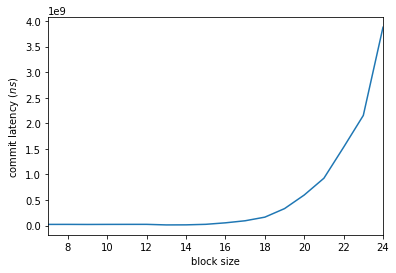

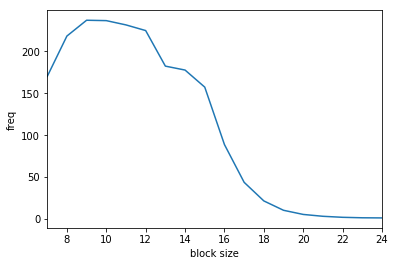

In [288]:
for label, df in cldf.groupby(cldf.index).mean().iteritems():
    plt.figure()
    ax = df.plot(xlim=[7,24])
    ax.set_ylabel(label)

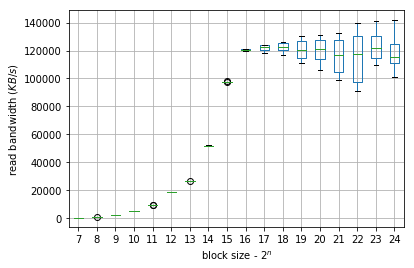

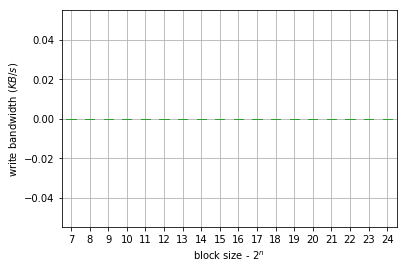

In [297]:
bwdf = pandas.read_csv(output_dir/'read-bandwidth.dat',header=None,index_col=0,names=['read','write'],delimiter='\t')
bwdf.index = np.int64(np.log2(bwdf.index))
for label in bwdf.columns:
    plt.figure()
    df = pd.concat([pd.Series(row, name=i) for i,row in bwdf[label].groupby(bwdf.index).apply(list).iteritems()], axis=1)
    ax = df.boxplot()
    ax.set_xlabel('block size - $2^n$')
    ax.set_ylabel('%s bandwidth ($KB/s$)' % label)

In [11]:
cols=['iops','1%','5%','10%','20%','30%','40%','50%','60%','70%','80%','90%','95%','99%','99.5%','99.9%','99.95%','99.99%']
ildf=pandas.read_csv(output_dir/'read-iops-latency.dat',header=None,index_col=0,names=cols,delimiter='\t')
ildf.index.name = 'block size'
ildf.columns.name = 'percentiles'

In [12]:
mildf = ildf.groupby(ildf.index).mean()/clat_grid.divider
mildf.index = np.log2(mildf.index)

Plotting to ceph-randread/blob.png


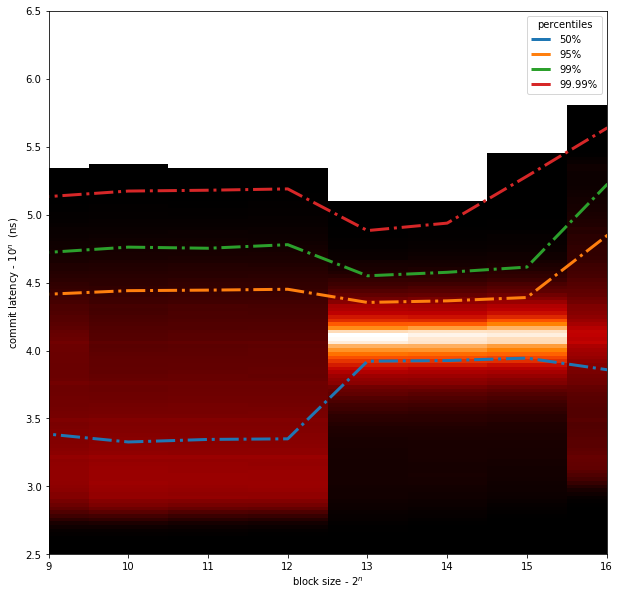

In [17]:
fig = clat_grid.plot_data(output_dir=output_dir,cmap='gist_heat')
# fig=df[[8,12,14,18]].plot(figsize=(10,10))
np.log10(mildf[['50%','95%','99%','99.99%']]).plot(figsize=(10,10),ax=fig.axes[0],xlim=[9,16],ylim=[2.5,6.5], linewidth=3,style='-.')
plt.xlabel('block size - $2^n$')
plt.ylabel('commit latency - $10^n$  (ns)')
plt.savefig('%s/%s'%(output_dir,'blob-overlay.png'))